In [1]:
# MNIST DATASET
# https://www.kaggle.com/c/digit-recognizer/data
# MNIST FASHION DATASET
# https://www.kaggle.com/zalando-research/fashionmnist

In [2]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay # New in version 0.24.
from sklearn.exceptions import FitFailedWarning
from scipy.ndimage.interpolation import shift

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time, os
%matplotlib inline

In [6]:
# Fashion-MNIST is a dataset of Zalando's fashion article images —consisting of a training set 
# of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, 
# associated with a label.

In [3]:
data_train = pd.read_csv(os.path.normpath("../Data/MNIST/fashion-mnist_train_11000.csv"))
data_test = pd.read_csv(os.path.normpath("../Data/MNIST/fashion-mnist_test_2000.csv"))

In [4]:
data_train

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10995,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10996,6,0,0,0,0,0,0,0,0,38,...,46,48,38,35,7,0,0,0,0,0
10997,0,0,0,0,0,1,0,0,0,39,...,111,109,114,99,0,0,0,0,0,0
10998,3,0,0,0,0,0,0,0,2,0,...,109,0,0,0,0,0,0,0,0,0


In [5]:
data_test

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2,0,0,0,0,0,0,0,0,1,...,0,0,0,132,158,68,0,0,0,0
1996,5,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,72,77,86,46,0
1997,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,139,182,120,0,0,0
1998,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
MNIST_LABEL_NAMES = [
    "T-shirt/top", 
    "Trouser", 
    "Pullover", 
    "Dress", 
    "Coat", 
    "Sandal", 
    "Shirt", 
    "Sneaker", 
    "Bag", 
    "Ankle boot"
]

In [7]:
y_train = data_train['label']
X_train = data_train.drop('label', axis = 1)
X_train = np.array(X_train)

y_test = data_test['label']
X_test = data_test.drop('label', axis = 1)
X_test = np.array(X_test)

In [8]:
data_test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(11000, 784)
(2000, 784)
(11000,)
(2000,)


In [10]:
n_samples = X_train.shape[0]
X1 = np.array(X_train)
images = X1.reshape(n_samples, 28, 28)

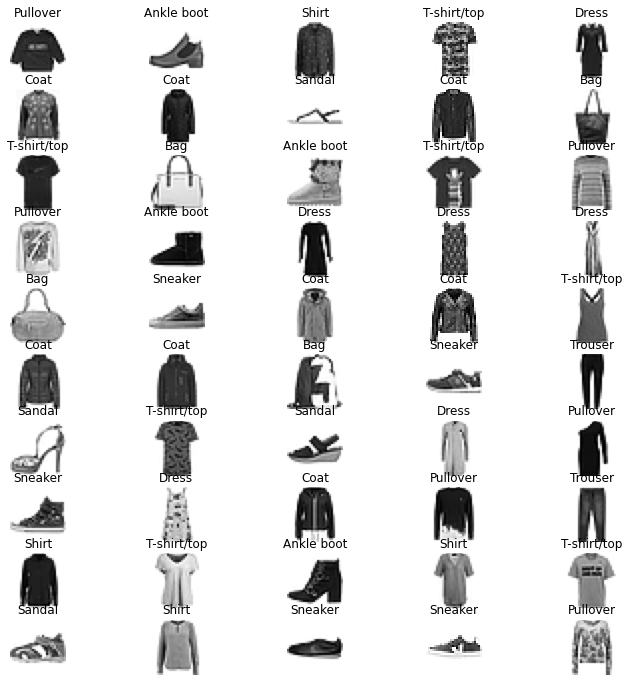

In [11]:
# Display some data
plt.figure(figsize=(12,12))
for i in range(0,50) :
    plt.subplot(10,5,i+1)
    plt.axis('off')
    plt.imshow(images[i], cmap="gray_r")
    plt.title(MNIST_LABEL_NAMES[y_train[i]])

In [12]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)

In [13]:
neigh.fit(X_train, y_train)    

KNeighborsClassifier(n_neighbors=3)

In [14]:
y_pred = neigh.predict(X_test)

In [15]:
def calculate_metrics(y_test, y_pred):
    acc = accuracy_score(y_test, y_pred) * 100
    f1 = f1_score(y_test, y_pred, average='macro') * 100
    prec = precision_score(y_test, y_pred, average='macro') * 100
    recall = recall_score(y_test, y_pred, average='macro') * 100
    return acc, f1, prec, recall

In [16]:
acc, f1, prec, recall = calculate_metrics(y_test, y_pred)

def display_metrics(acc, f1, prec, recall):
    print("Accuracy: {0:.2f}".format(acc))
    print("F1 Score: {0:.2f}".format(f1))
    print("Precision: {0:.2f}".format(prec))
    print("Recall: {0:.2f}".format(recall))
    
display_metrics(acc, f1, prec, recall)

Accuracy: 81.85
F1 Score: 82.17
Precision: 82.68
Recall: 82.12


In [17]:
report = classification_report(y_test, y_pred, target_names=MNIST_LABEL_NAMES)

print(report)

              precision    recall  f1-score   support

 T-shirt/top       0.71      0.82      0.76       195
     Trouser       0.98      0.94      0.96       189
    Pullover       0.70      0.71      0.70       205
       Dress       0.91      0.86      0.89       200
        Coat       0.73      0.73      0.73       199
      Sandal       0.98      0.77      0.86       202
       Shirt       0.59      0.57      0.58       213
     Sneaker       0.85      0.92      0.88       204
         Bag       0.97      0.94      0.95       188
  Ankle boot       0.85      0.96      0.90       205

    accuracy                           0.82      2000
   macro avg       0.83      0.82      0.82      2000
weighted avg       0.82      0.82      0.82      2000



In [18]:
# Interpretation

# Precision
#          T-shirt/top, pullover, and shirt have poor recall. 

# Recall
#          The classifier did the worst on shirts, then coats.
#          Recall for coats is moderately good.
#          Recall for trouser, dress, sandal and bag is very g00d.
#          Classification on T-shirt/top, pullover, dress, and sandal did moerately well.
# f1-score
# Support - perfectly balanced data set. Each class has 1000 samples.

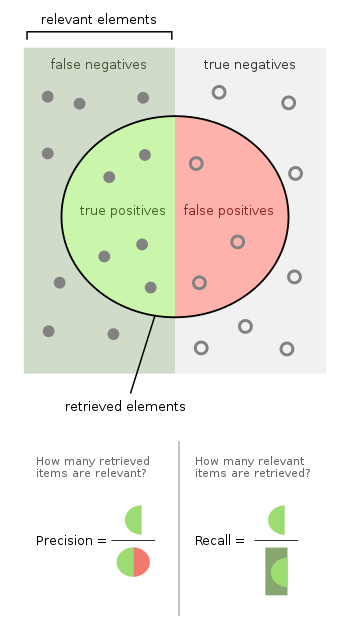

In [19]:
# In the diagram below, a perfect classifier would have no false positives 
# or false negatives
from IPython import display
display.Image(os.path.normpath("../Artwork/Precisionrecall.svg.png"))

In [20]:
# The reported averages include macro average (averaging the unweighted mean per label), 
# weighted average (averaging the support-weighted mean per label), and sample average 
# (only for multilabel classification). 

# Micro average (averaging the total true positives, false negatives and false positives)
# is only shown for multi-label or multi-class with a subset of classes, because it corresponds 
# to accuracy otherwise and would be the same for all metrics. 

# See also precision_recall_fscore_support for more details on averages.

In [21]:
from sklearn.metrics import precision_recall_fscore_support
y_true = y_test

# 'macro':
# Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance 
# into account.
precision_recall_fscore_support(y_true, y_pred, average='macro')

(0.8268225533567897, 0.8212435366944704, 0.8217331162314128, None)

In [22]:
# 'micro':
# Calculate metrics globally by counting the total true positives, false negatives and false positives.
precision_recall_fscore_support(y_true, y_pred, average='micro')

(0.8185, 0.8185, 0.8184999999999999, None)

In [23]:
# 'weighted':
# Calculate metrics for each label, and find their average weighted by support (the number of true
# instances for each label). This alters ‘macro’ to account for label imbalance; it can result in
# an F-score that is not between precision and recall.
precision_recall_fscore_support(y_true, y_pred, average='weighted')

(0.8238920761139643, 0.8185, 0.818884795574004, None)

In [24]:
c_matrix = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred), display_labels=MNIST_LABEL_NAMES)

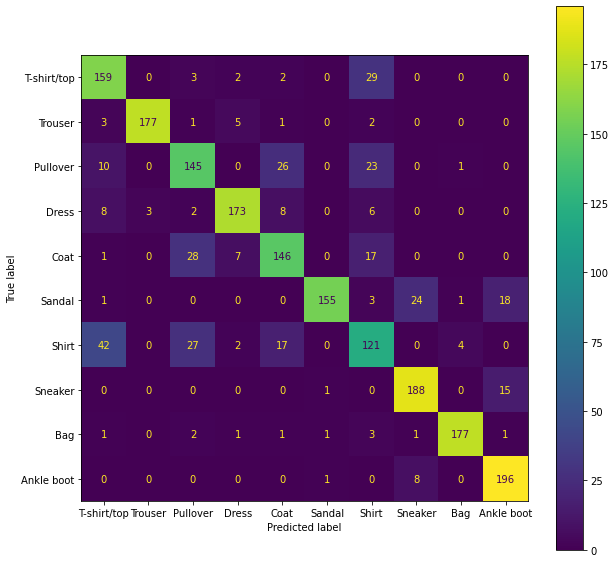

In [25]:
#c_matrix.plot()
fig, ax = plt.subplots(figsize=(10,10))
c_matrix.plot(ax=ax)

In [26]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_rf = rf.predict(X_test)
print(classification_report(y_test, y_rf))

              precision    recall  f1-score   support

           0       0.79      0.81      0.80       195
           1       1.00      0.95      0.97       189
           2       0.75      0.75      0.75       205
           3       0.89      0.93      0.91       200
           4       0.77      0.82      0.80       199
           5       0.96      0.91      0.94       202
           6       0.65      0.58      0.61       213
           7       0.91      0.90      0.91       204
           8       0.94      0.97      0.95       188
           9       0.89      0.95      0.92       205

    accuracy                           0.85      2000
   macro avg       0.86      0.86      0.86      2000
weighted avg       0.85      0.85      0.85      2000



In [27]:
cm = confusion_matrix(y_test, y_rf)
print(cm)

[[158   0   2   9   0   0  23   0   3   0]
 [  1 179   2   4   1   0   2   0   0   0]
 [  2   0 154   0  29   0  19   0   1   0]
 [  3   0   2 185   4   0   6   0   0   0]
 [  0   0  16   5 164   0  14   0   0   0]
 [  0   0   0   0   0 184   0   9   1   8]
 [ 36   0  29   3  14   0 124   0   7   0]
 [  0   0   0   0   0   5   0 184   0  15]
 [  0   0   0   1   0   1   4   0 182   0]
 [  0   0   1   0   0   1   0   9   0 194]]


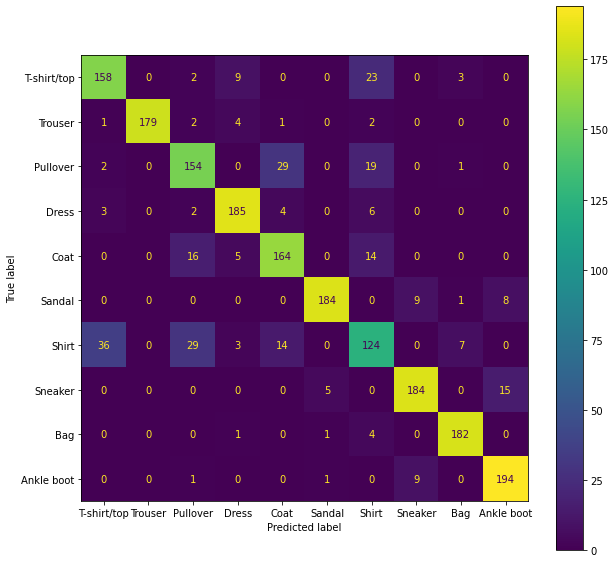

In [28]:
c_matrix = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=MNIST_LABEL_NAMES)
fig, ax = plt.subplots(figsize=(10,10))
c_matrix.plot(ax=ax)

In [29]:
# Class - try several other classifiers

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import ExtraTreesClassifier, VotingClassifier, BaggingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.svm import SVC, NuSVC
from sklearn.neural_network import MLPClassifier
from sklearn.experimental import enable_hist_gradient_boosting